In [1]:
EASY_MODE = True

MODE = "he-to-en"
END = ';'  
MAX_OUTPUT_LENGTH = 50 if not EASY_MODE else 20
REPORT_FREQ       = 100    

## Step1.  전처리

In [2]:
! head -n 10 data/main_dataset.txt

Anarchism	אנרכיזם
Autism	אוטיזם קלאסי
Albedo	אלבדו
A	A
Alabama	אלבמה
Achilles	אכילס
Abraham Lincoln	אברהם לינקולן
Aristotle	אריסטו
An American in Paris	אמריקאי בפריז
Academy Awards	פרס אוסקר


In [3]:
import numpy as np
from collections import defaultdict
word_to_translation = defaultdict(list)

with open("data/main_dataset.txt") as fin:
    for line in fin:
        en, he = line[:-1].lower().replace(END,' ').split('\t')
        word, trans = (he,en) if MODE=='he-to-en' else (en,he)
        if EASY_MODE:
            if max(len(word), len(trans)) > 20:
                continue
        word_to_translation[word+END].append(trans+END)
        
print("size = ", len(word_to_translation))

size =  130699


In [4]:
# 소스 언어에서 모든 유니크한 문자를 구하자(a.k.a 소스 사전)
all_words = list(word_to_translation.keys())
source_letters = list(set(''.join(all_words)))
source_to_ix = {l:i for i,l in enumerate(source_letters)}
print(source_to_ix)

{'c': 0, 'あ': 1, 'ぼ': 2, 'ê': 3, '一': 4, 'x': 5, 'א': 6, '×': 7, '°': 8, 'т': 9, '4': 10, 'ז': 11, 'a': 12, 'ґ': 13, 'ר': 14, 'ט': 15, 'チ': 16, 'ғ': 17, 'っ': 18, 'ו': 19, 'k': 20, '子': 21, 'ж': 22, 'ѻ': 23, '=': 24, '守': 25, 'ֿ': 26, 'б': 27, '−': 28, 'y': 29, 'ן': 30, 'н': 31, 'm': 32, 'ĵ': 33, 'þ': 34, 'č': 35, 'u': 36, 'д': 37, 'ĉ': 38, 'ׁ': 39, 'マ': 40, 'ָ': 41, '·': 42, '•': 43, 'у': 44, 'ぺ': 45, 'ױ': 46, 'к': 47, 'ص': 48, 'ѯ': 49, 'و': 50, 'á': 51, ' ': 52, '7': 53, 'f': 54, '3': 55, 'я': 56, 'ш': 57, 'ю': 58, '桜': 59, 'ç': 60, 'ד': 61, 'פ': 62, '0': 63, 'ц': 64, '’': 65, 'ø': 66, '榎': 67, 'ӡ': 68, 'כ': 69, 'س': 70, 'ث': 71, '仙': 72, 'ץ': 73, 'ÿ': 74, '野': 75, 'ش': 76, 'o': 77, 'd': 78, 'š': 79, 'í': 80, 'g': 81, 'ֵ': 82, 'る': 83, '猫': 84, 'ק': 85, 'ъ': 86, '$': 87, 't': 88, 'ع': 89, 'ĝ': 90, 'w': 91, '2': 92, '(': 93, 'コ': 94, 'ر': 95, 'è': 96, 'с': 97, 'ּ': 98, '@': 99, 'з': 100, '#': 101, 'ב': 102, 'à': 103, '門': 104, 'گ': 105, 'ò': 106, '8': 107, 'ע': 108, 'ظ': 109, 'ら': 110,

In [5]:
#타켓 언어에서 모든 유니크한 문자를 구하자
all_translations = [ts for all_ts in word_to_translation.values() for ts in all_ts]
target_letters = list(set([l for ts in all_translations for l in ts] + [" "]))
target_to_ix = {l:i for i,l in enumerate(target_letters)}
print(target_letters)

['ḳ', 'c', 'ʾ', 'ā', 'ο', 'ḍ', 'あ', 'ḏ', 'ê', 'ぼ', '一', 'ʻ', 'x', 'η', 'א', 'ρ', 'ğ', '×', 'ģ', 'զ', '°', 'ď', '4', 'т', 'ז', 'ŏ', 'a', 'ר', 'ט', 'チ', 'ė', 'っ', 'ä', 'ì', 'k', 'ו', '→', '=', 'ã', '子', 'û', '守', '−', 'y', 'ň', 'ź', 'ư', 'œ', 'ḥ', 'ן', 'm', 'վ', 'ĵ', 'ớ', 'þ', 'č', 'н', 'u', 'ồ', 'ĉ', 'ř', 'マ', '·', '≤', '•', 'ぺ', 'ş', 'у', 'ż', '♭', 'ķ', 'ա', 'к', 'ć', 'ص', 'ý', 'و', 'á', 'ơ', ' ', '7', 'τ', 'ɱ', 'f', '3', 'ï', 'я', 'ш', 'ţ', 'ю', '桜', 'ç', 'ד', 'פ', '0', 'ц', '’', 'ø', 'ă', 'å', 'σ', 'כ', '榎', 'س', '仙', 'ÿ', 'ղ', '野', 'o', 'd', '~', 'š', 'í', 'g', 'π', 'る', '猫', 'ק', '…', 'ù', 'ъ', '$', 't', 'ų', 'ū', 'ع', 'δ', 'ν', 'ễ', 'ʿ', 'ĝ', 'ž', 'w', '2', '(', 'コ', 'ر', 'è', 'ẓ', 'ů', '@', 'ב', '—', 'à', '門', 'ế', 'ņ', 'ò', '8', 'ע', 'ạ', 'ら', 'ь', 'р', 'n', 'ð', 'ľ', '′', 'æ', ')', '&', '.', 'ف', 'ף', 'о', 'ζ', 's', 'ļ', 'ı', 'ṯ', 'ס', 'ή', 'ń', 'ם', 'µ', 'ť', 'r', '"', 'ấ', 'ə', '⋯', 'ג', 'ы', 'י', 'v', 'л', 'ö', 'ח', 'в', 'と', 'и', 'ک', 'а', 'ộ', 'ś', 'ō', 'ŭ', '/', 'ę', 'п',

In [6]:
#특별한 토근들
EOS_ix_source=source_letters.index(END)
EOS_ix_target=target_letters.index(END)
BOS_ix_target = target_letters.index(" ")
PAD_ix=EOS_ix_source

작업의 범위를 예측하기위해 단어/번역 길이 분포를 그리자


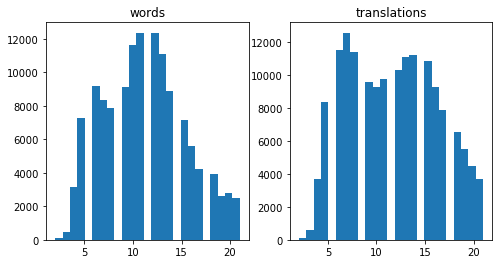

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.figure(figsize=[8,4])
plt.subplot(1,2,1)
plt.title("words")
plt.hist(list(map(len,all_words)),bins=25);

plt.subplot(1,2,2)
plt.title('translations')
plt.hist(list(map(len,all_translations)),bins=25);


## 두번째 단계: 보조 함수들
몇가지 헬퍼 함수가 필요하다:
- 문자열로부터 데이타를 정수 행렬들로 바꾸기
- 샘플 랜덤 미니배치

In [8]:
def as_matrix(sequences, token_to_i, max_len=None, PAX_ix=PAD_ix):
    """
    가변 길이 토근 시퀀스를 고정된 크기의 행렬로 바꾸자.
    사용 예제:
    >>>print( as_matrix(words[:3],source_to_ix))
    [[15 22 21 28 27 13 -1 -1 -1 -1 -1]
     [30 21 15 15 21 14 28 27 13 -1 -1]
     [25 37 31 34 21 20 37 21 28 19 13]]
    """
    
    max_len = max_len or max(map(len, sequences))
    
    matrix = np.zeros((len(sequences), max_len), dtype='int32') + PAD_ix
    for i,seq in enumerate(sequences):
        row_ix = list(map(token_to_i.get, seq))[:max_len]
        matrix[i,:len(row_ix)] = row_ix
    
    return matrix

In [9]:
import random
def sample_batch(words, word_to_translation, batch_size):
    """
    각 단어에 대해 단어와 랜덤한 올바른 번역의 랜덤 배치를 샘플링하기
    예제 사용법:
        batch_x, batch_y = sample_batch(train_words, word_to_translations, 10)
    """
    
    #단어들 선택하기
    batch_words = np.random.choice(words, size=batch_size)
    batch_words_len = np.array(list(map(len, batch_words)))
    
    #번역 선택하기
    batch_trans_candidates = list(map(word_to_translation.get, batch_words))
    batch_trans = list(map(random.choice, batch_trans_candidates))
    batch_trans_len = np.array(list(map(len, batch_trans)))
    
    return as_matrix(batch_words,source_to_ix), batch_words_len, \
        as_matrix(batch_trans,target_to_ix), batch_trans_len

### 데이터 셋 자르기
모든 단어의 20퍼센트는 validation를 위해 사용한다.

In [10]:
from sklearn.cross_validation import train_test_split
train_words,test_words = train_test_split(all_words,test_size=0.1,random_state=42)

/hanmail/.pyenv/versions/anaconda3-4.3.1/lib/python3.6/site-packages/sklearn/cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


## 3단계: encoder-decoder를 생성하기
아키텍쳐는 두개의 주요 블록으로 구성된다:
- Encoder는 단어들을 문자로 읽고 마지막 상태 벡터를 리턴한다.(일반적으로 마지막 RNN 상태 함수)
- Decoder는 그 상태 벡터를 가지고 문자단위로 번역을 리턴한다

이 섹션에서 encoder를 구현한다.

In [11]:
def get_mask_by_eos(is_eos):
    """takes indicator of "it ends now", returns mask.
    Ignores everything after first end."""
    assert is_eos.ndim==2
    is_right_after_eos = np.concatenate([np.zeros_like(is_eos[:,:1]),is_eos[:,:-1]],-1)
    is_after_eos = np.eq(np.cumsum(is_right_after_eos,axis=-1),0).astype('uint8')
    return is_after_eos

In [12]:
import tensorflow as tf

from collections import namedtuple

# params
HParams = namedtuple(
  "HParams",
  [
    "cell",
    "batch_size",
    "layers",
    "attention",
    "enc_embedding_dim",
    "dec_embedding_dim",
    "hidden_size",
    "attn_size",
    "eval_batch_size",
    "learning_rate",
    "max_source_len",
    "max_target_len",
    "optimizer",
    "optimizer_clip_gradients",
    "ckpt_path"
  ])

# create params
def create_hparams():
    return HParams(
        cell=tf.contrib.rnn.GRUCell,
        batch_size=32,
        layers=1,
        attention=False,
        eval_batch_size=1,
        optimizer="Adam",
        optimizer_clip_gradients = 10.0,
        learning_rate=0.001,
        enc_embedding_dim=50,
        dec_embedding_dim=50,
        hidden_size=512,
        attn_size=512,
        max_source_len=40,
        max_target_len=MAX_OUTPUT_LENGTH,
        ckpt_path='./ckpt_dir/model2.ckpt')
hparams = create_hparams()

In [13]:
#check gpu
from tensorflow.python.client import device_lib

def get_available_gpus():
    local_device_protos = device_lib.list_local_devices()
    return [x.name for x in local_device_protos if x.device_type == 'GPU']
print(get_available_gpus())



['/gpu:0', '/gpu:1', '/gpu:2', '/gpu:3', '/gpu:4', '/gpu:5', '/gpu:6', '/gpu:7']


## Model
Here we define functions for model inference (both greedy and sampled).

In [14]:
from tensorflow.python.client import device_lib

def rl_loss(logits, targets, advantage, weights, name=None):

        if len(logits.get_shape()) != 3:
            raise ValueError("Logits must be a "
                             "[batch_size x sequence_length x logits] tensor")
        
        if len(targets.get_shape()) != 2:
            raise ValueError("Targets must be a [batch_size x sequence_length] "
                         "tensor")
        
        if len(weights.get_shape()) != 2:
            raise ValueError("Weights must be a [batch_size x sequence_length] "
                             "tensor")
        with tf.name_scope(name, "sequence_loss", [logits, targets, weights]):
            num_classes = tf.shape(logits)[2]
            probs_flat = tf.nn.softmax(tf.reshape(logits, [-1, num_classes]))
            targets = tf.reshape(targets, [-1])
            
            probs = tf.reduce_sum(probs_flat * tf.one_hot(targets, depth=num_classes), 1)
            logprobs = tf.log(probs)
            
            crossent = -logprobs * tf.reshape(weights, [-1])
            
            batch_size = tf.shape(logits)[0]
            sequence_length = tf.shape(logits)[1]
            crossent = tf.reshape(crossent, [batch_size, sequence_length])

            J = crossent * advantage[:, None] 

            loss = tf.reduce_sum(J)
            total_size = tf.reduce_sum(weights)
            loss /= total_size

            #regularize with negative entropy
            entropy = -probs * logprobs 
            entropy = tf.reduce_sum(entropy)
            total_size = tf.reduce_sum(weights)
            entropy /= total_size

            loss -=  0.01*entropy
        
            return loss




In [95]:
from tensorflow.python.layers.core import Dense
from sample_embedding_helper import SampleEmbeddingHelper
from tensorflow.python.ops.rnn_cell_impl import _zero_state_tensors

import os

class Seq2SeqModel:
    def __init__(self, config, mode='training'):
        self.config = config
        self.mode = mode
        self.max_target_len = self.config.max_target_len
        self.available_gpus = get_available_gpus()
        self.current_gpu_index = 0
        self.total_gpu_cnt = len(self.available_gpus)
        
    def _get_next_gpu(self):
        if self.total_gpu_cnt == 0:
            return 'cpu:0'
        else:
            self.current_gpu_index += 1
            self.current_gpu_index %= (self.total_gpu_cnt + 1)
            return self.available_gpus[self.current_gpu_index-1]
        
    # add placeholders
    def _add_placeholders(self):
        self.input_ids = tf.placeholder(
            tf.int32,
            shape=[None, None],
            name='input_ids')

        self.inputs_len = tf.placeholder(
            tf.int32,
            shape=[None],
            name='inputs_len')
        
        if self.mode == 'training':
            self.target_ids = tf.placeholder(
                tf.int32,
                shape=[None, None],
                name='target_ids')

            self.targets_len = tf.placeholder(
                tf.int32,
                shape=[None],
                name='targets_len')
                      
            self.rl_enable = tf.placeholder(
                tf.bool,
                shape=None,
                name='rl_enable'
            )
            
            self.targets_length = tf.minimum(self.targets_len, self.config.max_target_len)
            #self.max_target_len = tf.reduce_max(self.targets_length, name='max_target_len')
            self.targets = self.target_ids[:, :self.max_target_len]
        #else:
                    
    # build a computation graph
    def build_graph(self, saver=None):
        # add placeholder variables
        self._add_placeholders()

        # build encoder
        self._add_encoder()
        
        # build decoder
        self._add_decoder()
            
        #optimizer
        if self.mode == 'training':
            self._add_optimizer()
        
        if saver:
            self.saver = saver
        else:
            self.saver = tf.train.Saver()

    # encoder layer
    def _add_encoder(self):
        with tf.variable_scope('Encoder') as scope:
            self.batch_size = tf.shape(self.input_ids)[0]

            enc_W_emb = tf.get_variable('en_embedding', 
                                        initializer=tf.random_uniform([len(source_letters), self.config.enc_embedding_dim]),
                                        dtype=tf.float32)
            
            enc_emb_inputs = tf.nn.embedding_lookup(
                enc_W_emb, self.input_ids, name='emb_inputs')

            # bidirectional rnn
            if self.config.layers == 1:
                enc_cell = tf.contrib.rnn.DeviceWrapper(
                    self.config.cell(self.config.hidden_size), 
                    device=self._get_next_gpu())
                
                self.enc_outputs, self.enc_last_state = tf.nn.dynamic_rnn(
                    cell=enc_cell,
                    inputs=enc_emb_inputs,
                    sequence_length=self.inputs_len,
                    time_major=False,
                    dtype=tf.float32)                
            else:
                enc_cell_fw = self.config.cell(self.config.hidden_size)
                enc_cell_fw = tf.contrib.rnn.DeviceWrapper(enc_cell_fw, device=self._get_next_gpu())

                gpu2 = self._get_next_gpu()

                enc_cell_bw = self.config.cell(self.config.hidden_size)
                enc_cell_bw = tf.contrib.rnn.DeviceWrapper(enc_cell_bw, device=gpu2)

                enc_outputs, enc_state = tf.nn.bidirectional_dynamic_rnn(enc_cell_fw, 
                                                                           enc_cell_bw, 
                                                                           enc_emb_inputs,
                                                                           self.inputs_len,
                                                                           dtype=tf.float32)
                enc_outputs = tf.concat(enc_outputs,2)

                enc_cell = tf.contrib.rnn.DeviceWrapper(
                        self.config.cell(num_units=self.config.hidden_size),
                        device=gpu2)

                # multi rnn
                if self.config.layers > 2:
                    enc_cell = [enc_cell]
                    for _ in range(self.config.layers-2):
                        enc_cell.append(tf.contrib.rnn.DeviceWrapper(
                            tf.contrib.rnn.ResidualWrapper(
                                self.config.cell(num_units=self.config.hidden_size)),
                            device=self._get_next_gpu()))

                    enc_cell = tf.contrib.rnn.MultiRNNCell(enc_cell)
                    
                
                self.enc_outputs, self.enc_last_state = tf.nn.dynamic_rnn(
                    cell=enc_cell,
                    inputs=enc_outputs,
                    sequence_length=self.inputs_len,
                    time_major=False,
                    dtype=tf.float32)
                
                self.enc_last_state = (enc_state[0],) + self.enc_last_state
                
    # decoder layer
    def _add_decoder(self):
        with tf.variable_scope('Decoder') as scope:
            cells = []
            if self.config.layers > 1:
                for i in range(self.config.layers):
                    if i == 0:
                        cells.append(tf.contrib.rnn.DeviceWrapper(
                            self.config.cell(self.config.hidden_size), 
                            device=self._get_next_gpu()))
                    else:
                        cells.append(tf.contrib.rnn.DeviceWrapper(
                            tf.contrib.rnn.ResidualWrapper(
                                self.config.cell(num_units=self.config.hidden_size)),
                            device=self._get_next_gpu()))

                self.dec_cell = tf.contrib.rnn.MultiRNNCell(cells)
            else:
                self.dec_cell = tf.contrib.rnn.DeviceWrapper(
                                    self.config.cell(self.config.hidden_size), 
                                    device=self._get_next_gpu())
            
            if self.config.attention:
                attn_mech = tf.contrib.seq2seq.LuongAttention(
                        num_units=self.config.attn_size,
                        memory=self.enc_outputs,
                        memory_sequence_length=self.inputs_len,
                        normalize=False,
                        name='LuongAttention')

                self.dec_cell = tf.contrib.seq2seq.DynamicAttentionWrapper(
                        cell=self.dec_cell,
                        attention_mechanism=attn_mech,
                        attention_size=self.config.attn_size,
                        # attention_history=False (in ver 1.2)
                        name='Attention_Wrapper')

                # last_enc_state wrapper
                self.initial_state = tf.contrib.seq2seq.DynamicAttentionWrapperState(
                        cell_state=self.enc_last_state,
                        attention=_zero_state_tensors(self.config.attn_size, self.batch_size, tf.float32))
            else:
                self.initial_state = self.enc_last_state

            self.dec_W_emb = tf.get_variable('de_embedding', 
                                             initializer=tf.random_uniform([len(target_letters),
                                                                            self.config.dec_embedding_dim]),
                                             dtype=tf.float32)
                
            self.output_layer = Dense(len(target_letters), name='output_projection')
            if self.mode == 'training': # training layer
                self.sampling_predictions, self.greedy_predictions, self.rl_loss = self._add_rl_training_layer(scope)
                self.predictions, self.loss = self._add_training_layer(scope)
                
            else: # inference layer
                self.predictions = self._add_inference_layer()     

    # inference layer
    def _add_inference_layer(self):
        # inference layer
        sequence_start = [BOS_ix_target]
        start_tokens = tf.tile(sequence_start, [self.batch_size], name='start_tokens')

        inference_helper = tf.contrib.seq2seq.GreedyEmbeddingHelper(
            embedding=self.dec_W_emb,
            start_tokens=start_tokens,
            end_token=EOS_ix_target) 

        inference_decoder = tf.contrib.seq2seq.BasicDecoder(
            cell=self.dec_cell,
            helper=inference_helper,
            initial_state=self.initial_state,
            output_layer=self.output_layer)

        inference_outputs, _ = tf.contrib.seq2seq.dynamic_decode(
            inference_decoder,
            output_time_major=False,
            impute_finished=True,
            maximum_iterations=self.max_target_len)
            
        predictions = inference_outputs.sample_id
        return predictions
    
    # training layer
    def _add_training_layer(self, scope):
        # training_layer
        self.max_target_len = tf.reduce_max(self.targets_length, name='max_target_len')
        
        dec_inputs = tf.concat([tf.zeros_like(self.targets[:,:1])+BOS_ix_target,
                                          self.targets[:,:-1]],axis=1)
        
        dec_emb_inputs = tf.nn.embedding_lookup(
            self.dec_W_emb, dec_inputs, name='emb_inputs')

        training_helper = tf.contrib.seq2seq.TrainingHelper(
            inputs=dec_emb_inputs,
            sequence_length=self.targets_length,
            time_major=False,
            name='training_helper')

        training_decoder = tf.contrib.seq2seq.BasicDecoder(
            cell=self.dec_cell,
            helper=training_helper,
            initial_state=self.initial_state,
            output_layer=self.output_layer)

        max_target_len = tf.reduce_max(self.targets_length, name='max_target_len')
        
        train_outputs, _ = tf.contrib.seq2seq.dynamic_decode(
            training_decoder,
            output_time_major=False,
            impute_finished=True,
            maximum_iterations=max_target_len)
            
        # predictions
        predictions = train_outputs.sample_id

        masks = tf.sequence_mask(self.targets_length, self.max_target_len, dtype=tf.float32, name='masks')

        # loss
        loss = tf.contrib.seq2seq.sequence_loss(logits=train_outputs.rnn_output, 
                                                     targets=self.targets,
                                                     weights=masks, name='batch_loss')        
        return predictions, loss
        
    def _add_rl_training_layer(self, scope):
        # RL training_layer
        sequence_start = [BOS_ix_target]
        start_tokens = tf.tile(sequence_start, [self.batch_size], name='start_tokens')

        #greedy decoding
        greedy_helper = tf.contrib.seq2seq.GreedyEmbeddingHelper(
            embedding=self.dec_W_emb,
            start_tokens=start_tokens,
            end_token=EOS_ix_target) 

        greedy_decoder = tf.contrib.seq2seq.BasicDecoder(
            cell=self.dec_cell,
            helper=greedy_helper,
            initial_state=self.initial_state,
            output_layer=self.output_layer)

        greedy_dec_outputs, _ = tf.contrib.seq2seq.dynamic_decode(
            greedy_decoder,
            output_time_major=False,
            impute_finished=True,
            maximum_iterations=self.max_target_len)

        # greedy predictions
        greedy_predictions = greedy_dec_outputs.sample_id
        
        scope.reuse_variables()

        #sampling decoding
        training_sampling_helper = SampleEmbeddingHelper(
            embedding=self.dec_W_emb,
            start_tokens=start_tokens,
            end_token=EOS_ix_target)

        training_sampling_decoder = tf.contrib.seq2seq.BasicDecoder(
            cell=self.dec_cell,
            helper=training_sampling_helper,
            initial_state=self.initial_state,
            output_layer=self.output_layer)

        train_outputs, _ = tf.contrib.seq2seq.dynamic_decode(
            training_sampling_decoder,
            output_time_major=False,
            impute_finished=True,
            maximum_iterations=self.max_target_len)

        #seq_len = tf.shape(train_outputs.rnn_output)[1]

        # predictions
        predictions = train_outputs.sample_id
        
        # mask
        masks = tf.sign(tf.to_float(predictions))

        # advantage
        self.advantage = tf.py_func(self._calculate_advantage,
                               [self.input_ids,
                                predictions,
                                greedy_predictions], Tout=tf.float32)
        self.advantage = tf.reshape(self.advantage, [self.batch_size])
        # loss
        loss = rl_loss(logits=train_outputs.rnn_output, 
                       targets=predictions,
                       advantage=self.advantage, 
                       weights=masks, 
                       name='rl_loss')
        
        return predictions, greedy_predictions, loss

    # optimizing layer
    def _add_optimizer(self):
        with tf.variable_scope('Optimizer') as scope:
            def _clip_gradients(grads_and_vars):
                """Clips gradients by global norm."""
                gradients, variables = zip(*grads_and_vars)
                clipped_gradients, _ = tf.clip_by_global_norm(
                    gradients, self.config.optimizer_clip_gradients)
                return list(zip(clipped_gradients, variables))
            loss = tf.cond(self.rl_enable, lambda : self.rl_loss, lambda : self.loss)
            
            self.train_op = tf.contrib.layers.optimize_loss(loss=loss, 
                                                            global_step=tf.contrib.framework.get_global_step(),
                                                            learning_rate=self.config.learning_rate, 
                                                            clip_gradients=_clip_gradients,
                                                            optimizer=self.config.optimizer)

    # translate a word
    def translate(self, sess, word, sample=False):
        #if os.path.isfile(self.config.ckpt_path):
        #    self.restore(sess)
            
        assert word.endswith(END)
        word_len = np.array([len(word)])
        word_ix = as_matrix([word.lower()],source_to_ix)
        feed_dict = {self.input_ids: word_ix, self.inputs_len: word_len}
        if sample:
            outputs = sess.run(self.predictions, feed_dict=feed_dict)
        else:
            outputs = sess.run(self.predictions, feed_dict=feed_dict)
        trans = list(map(target_letters.__getitem__, outputs[0]))
        if END in trans:
            trans = trans[:trans.index(END)+1]
            
        return ''.join(trans)
    
    # infer method(for a batch)
    def infer(self, sess, inputs, inputs_len):
        #if os.path.isfile(self.config.ckpt_path):
        #    self.restore(sess)
        
        feed_dict = {self.input_ids: inputs, self.inputs_len: inputs_len}
        
        outputs = sess.run(self.predictions, feed_dict=feed_dict)
    
        return outputs
    
    # train a step
    def train_step(self, sess, inputs, inputs_len, targets, targets_len):
        feed_dict = {self.input_ids: inputs, self.inputs_len: inputs_len,
                    self.target_ids: targets, self.targets_len: targets_len,
                    self.rl_enable: False}
        _, loss = sess.run([self.train_op, self.loss], feed_dict=feed_dict)
        #loss = sess.run(self.advantage, feed_dict=feed_dict)
        return loss
    
    def summary(self):
        summary_writer = tf.summary.FileWriter(
            logdir=self.config.ckpt_path, graph=tf.get_default_graph())
               
    def restore(self, sess, ckpt_path=None):
        if ckpt_path:
            self.saver.restore(sess, ckpt_path)
        else:
            self.saver.restore(sess, self.config.ckpt_path)
        print('Restore Finished!')
        
    def save(self, sess, save_path=None):
        if save_path:
            self.saver.save(sess, save_path)
            print(f'Saving model at {save_path}')
        else:
            self.saver.save(sess, self.config.ckpt_path)
            print(f'Saving model at {save_path}')

            
    def rl_train_step(self, sess, inputs, inputs_len, targets, targets_len):
        
        feed_dict = {self.input_ids: inputs, self.inputs_len: inputs_len,
                    self.target_ids: targets, self.targets_len: targets_len,
                    self.rl_enable: True}
        
        #sampling_preds, greedy_preds = sess.run([self.predictions, self.greedy_predictions], 
        #                                        feed_dict=feed_dict)
        
        #print(sampling_preds)
        #print(greedy_preds)
        #sampling_masks = get_mask_by_eos(np.equal(sampling_preds,EOS_ix_target))
        #greedy_masks = get_mask_by_eos(np.equal(greedy_preds,EOS_ix_target))
        #input_masks = get_mask_by_eos(np.equal(inputs, EOS_ix_source))
        
        #rewards = -compute_levenshtein(inputs, input_masks, sampling_preds, sampling_masks)
        #baseline = -compute_levenshtein(inputs, input_masks, greedy_preds, greedy_masks)

        #advantage = rewards - baseline
        #print(advantage)
        
        #feed_dict.update({self.advantage:advantage})

        preds, _, loss = sess.run([self.predictions, self.train_op, self.loss], feed_dict=feed_dict)
        
        return loss
        
    def _calculate_advantage(self, inputs, sampling_preds, greedy_preds):
        
        sampling_masks = get_mask_by_eos(np.equal(sampling_preds,EOS_ix_target))
        greedy_masks = get_mask_by_eos(np.equal(greedy_preds,EOS_ix_target))
        input_masks = get_mask_by_eos(np.equal(inputs, EOS_ix_source))
        
        rewards = -compute_levenshtein(inputs, input_masks, sampling_preds, sampling_masks)
        baseline = -compute_levenshtein(inputs, input_masks, greedy_preds, greedy_masks)

        advantage = rewards - baseline
        return advantage


In [96]:

#test untrained model
#should be random
tf.reset_default_graph()
print ('x:'+all_words[0])
seq2seq = Seq2SeqModel(hparams, mode='inference')
seq2seq.build_graph()
with tf.Session() as sess:
    #seq2seq.restore(sess)
    sess.run(tf.global_variables_initializer())
    print ('y_sampled:'+seq2seq.translate(sess, all_words[0],sample=True))
    print ('y_greedy:'+seq2seq.translate(sess, all_words[0]))
#praise Cthulhu!


x:אנרכיזם;
y_sampled:ıلللqqqqṇṇṇááףqqqqqq
y_greedy:ıلللqqqqṇṇṇááףqqqqqq


### Score 함수
LogLikelihood는 모델 성능 평가에 좋지 않다.
- 제로 확률이 한번 예측 되면, 전체 모델을 망치지 말아야 한다.
- 여러개의 바른 답이 있다면 단지 하나의 번역을 배우는 것만으로 충분하다.
- 한 단계마다 가장 있을법한 음소를 가지는지 출력해???

그러므로, 우리는 최소 Levenshten distance를 사용할 것이다.

In [87]:
import editdistance

def get_distance(word, trans):
    """
    워드와 예측된 번역을 입력으로 하고 바른 번역에 얼마나 가까운지 edit distance를 평가한다.
    """
    #print(word)
    references = word_to_translation[word]
    #print(references)
    #print(trans)
    assert len(references) !=0, "word/unknown word"
    return min(editdistance.eval(trans, ref) for ref in references)

In [82]:
def score(sess, model, bsize=100):
    """
    bszie의 랜덤 샘플에 대해 levenshtein distance를 계산하는 함수
    """
    batch_words = np.random.choice(test_words, size=(bsize,)) 
    #for word in batch_words:
    #    print(word)
    predictions = [model.translate(sess, word) for word in batch_words]
    #for p in predictions:
    #    print(p)
    #print(predictions)
    distances = [get_distance(word, prediction) for (word, prediction) in zip(batch_words, predictions)]    
    return np.array(distances,dtype='float32')   

In [83]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    #should be around 5-50 and decrease rapidly :)
    result = [score(sess, seq2seq, 100).mean() for _ in range(10)]
print(result)

[19.959999, 19.959999, 19.959999, 19.92, 19.9, 19.940001, 19.93, 19.92, 19.92, 19.959999]


## Step 4: Supervised pre-training
여기에서 로그 우도를 최대화 함으로써 모델을 학습하는 함수를 정의하자.

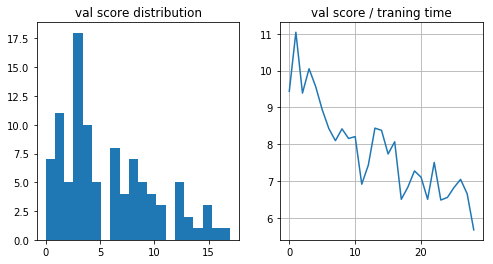

llh=1.419, mean score=6.768
INFO:tensorflow:Restoring parameters from ./ckpt_dir/model2.ckpt


 12%|█▏        | 2900/25000 [08:40<8:53:45,  1.45s/it]

Restore Finished!


 12%|█▏        | 2934/25000 [08:45<47:24,  7.76it/s]  

KeyboardInterrupt: 

In [97]:
from IPython.display import clear_output
from tqdm import tqdm,trange #or use tqdm_notebook,tnrange

loss_history=[]
editdist_history = []
tf.reset_default_graph()
seq2seq = Seq2SeqModel(hparams)
seq2seq.build_graph()

sess = tf.Session()
sess.run(tf.global_variables_initializer())
#seq2seq.restore(saver, sess)
for i in trange(25000):
    loss_history.append(
             seq2seq.train_step(sess, *sample_batch(train_words,word_to_translation,32)))
        
    if (i+1)%REPORT_FREQ==0:
    #if False:
            seq2seq.save(sess)
            sess.close()
            
            tf.reset_default_graph()
            sess = tf.Session()
            
            seq2seq_inference = Seq2SeqModel(hparams, mode='inference')
            seq2seq_inference.build_graph()
            seq2seq_inference.restore(sess)
                
            clear_output(True)
            current_scores = score(sess, seq2seq_inference)
            editdist_history.append(current_scores.mean())
            plt.figure(figsize=(8,4))
            plt.subplot(121)
            plt.title('val score distribution')
            plt.hist(current_scores, bins = 20)
            plt.subplot(122)
            plt.title('val score / traning time')
            plt.plot(editdist_history)
            plt.grid()
            plt.show()
            print("llh=%.3f, mean score=%.3f"%(np.mean(loss_history[-10:]),np.mean(editdist_history[-10:])))
            tf.reset_default_graph()
            seq2seq = Seq2SeqModel(hparams)
            seq2seq.build_graph()
            sess = tf.Session()
            seq2seq.restore(sess)

seq2seq.save(sess)
sess.close()

In [98]:
tf.reset_default_graph()
seq2seq_inference = Seq2SeqModel(hparams, mode='inference')
seq2seq_inference.build_graph()

with tf.Session() as sess:
    seq2seq_inference.restore(sess)
    
    for word in train_words[:10]:
        print("%s -> %s"%(word,seq2seq_inference.translate(sess, word)))

INFO:tensorflow:Restoring parameters from ./ckpt_dir/model2.ckpt
Restore Finished!
עלי נאסר; -> ali nesser;
קטגוריה:בלפסט; -> belfstet;
ארבינקא; -> arbinaka;
זיכרון נוהלי; -> zicron nolly;
scar tissue; -> scart stisso;
עמק האלבה בדרזדן; -> amar bender;
ז'ורז' בולנז'ה; -> georges bollanze;
מילקן; -> milken;
כביש 73; -> housh 30;
אלין; -> elin;


## Step 5: 정책 그라디언트(Policy gradient )

손실(loss) 함수를 정의 할 필요가 있다.

우리 작업은 단어와 번역 행렬들을 입력으로 가지고 그것들을 실제 단어 그리고 음절로 변환하고 위에 get_distance 함수를 통해서 min-levenshtein를 계산하는 _compute_levenshtein을 구현하는 것이다.

In [99]:
def get_mask_by_eos(is_eos):
    """ "지금 부터 끝이다"의 표시를 가지고, mask를 리턴한다. 
    첫번째 마지막이후로 모든것을 무시한다. 
    [[False,False,True,True]] -> [[1,1,1,0]]
    """
    assert is_eos.ndim==2
    is_right_after_eos = np.concatenate([np.zeros_like(is_eos[:,:1]),is_eos[:,:-1]],-1)
    is_after_eos = np.equal(np.cumsum(is_right_after_eos,axis=-1), 0).astype('uint8')
    return is_after_eos


In [100]:
def compute_levenshtein(words_ix,words_mask,trans_ix,trans_mask):
    """
    예측된 번역에 대한 levenshtein 손실을 계산하는 커스텀 theano 연산이다.
    
    Params:
    - words_ix - 문자 인덱스 행렬, shape=[batch_size, word_length]
    - words_mask - 0과1로 구성된 행렬,
        1은 단어는 아직 끝나지 않았음을 의미한다.
        0은 단어는 이미 끝나고 이것은 패딩이다는 것을 의미한다.
    -trans_ix - 결과 문자 인덱스 행렬, shape=[batch_size,translation_length]
    -trans_mask - 0과1로 구성된 행렬 word_mask와 유사하다. 그러나 tans_ix를 위한 것이다.
    
    """
    
    words = []
    for i, letters_ix in enumerate(words_ix):
        word = ''.join([source_letters[letter_ix] for letter_ix in letters_ix][:sum(words_mask[i])])
        words.append(word)
        
    assert type(words) is list
    assert type(words[0]) is str 
    assert len(words)==len(words_ix)
    
    #convert translations to lists    
    translations = []
    for i, tran_ix in enumerate(trans_ix):
        tran = ''.join([target_letters[letter_ix] for letter_ix in tran_ix][:sum(trans_mask[i])])
        translations.append(tran)
    
        
    assert type(translations) is list
    assert type(translations[0]) is str
    assert len(translations)==len(trans_ix)

    distances = [get_distance(w,t) for w, t in zip(words, translations)]
    
    assert type(distances) in (list,tuple,np.ndarray) and len(distances) == len(words_ix)
    
    distances = np.array(list(distances),dtype='float32')
    return distances

In [101]:
#test suite
#sample random batch of (words, correct trans, wrong trans)
batch_words = np.random.choice(train_words, size=100 )
batch_trans = list(map(random.choice,map(word_to_translation.get,batch_words )))
batch_trans_wrong = np.random.choice(all_translations,size=100)

batch_words_ix = as_matrix(batch_words,source_to_ix)
batch_trans_ix = as_matrix(batch_trans,target_to_ix)
batch_trans_wrong_ix = as_matrix(batch_trans_wrong,target_to_ix)

batch_words_mask = get_mask_by_eos(np.equal(batch_words_ix,EOS_ix_source))
batch_trans_mask = get_mask_by_eos(np.equal(batch_trans_ix,EOS_ix_target))
batch_trans_wrong_mask = get_mask_by_eos(np.equal(batch_trans_wrong_ix,EOS_ix_target))

In [102]:
#assert compute_levenshtein is zero for ideal translations
correct_answers_score = compute_levenshtein(batch_words_ix,batch_words_mask,
                                            batch_trans_ix,batch_trans_mask)

assert np.all(correct_answers_score==0),"a perfect translation got nonzero levenshtein score!"

print("Everything seems alright!")

Everything seems alright!


In [103]:
#assert compute_levenshtein matches actual scoring function
wrong_answers_score = compute_levenshtein(batch_words_ix,batch_words_mask,
                                            batch_trans_wrong_ix,batch_trans_wrong_mask)

true_wrong_answers_score = np.array(list(map(get_distance,batch_words,batch_trans_wrong)))

assert np.all(wrong_answers_score==true_wrong_answers_score),"for some word symbolic levenshtein is different from actual levenshtein distance"

print("Everything seems alright!")

Everything seems alright!


## Self-critical policy gradient
이 섹션에서, self-critical sequence학습이라고 하는 알고리즘을 구현할 것이다.
이 알고리즘은 특별한 베이스라인을 가진 바닐라 정책 그라디언트이다.

$$ \nabla J = E_{x \sim p(s)} E_{y \sim \pi(y|x)} \nabla log \pi(y|x) \cdot (R(x,y) - b(x)) $$

여기서 R(x,y)는 네가티브 levenshtein distance 이다(그것을 최소화 하기 때문이다). 베이스라인 b(x)는 단어 x에 대하 모델이 얼마나 되는지 나타낸다. 실제적으로, 이것은 그라디(greedy) 번역 점수로써 베이스라인을 계산한다는 것을 의미한다, $b(x) = R(x,y_{greedy}(x)) $.

In [104]:
# create params
def create_hparams():
    return HParams(
        cell=hparams.cell,
        batch_size=hparams.batch_size,
        layers=hparams.layers,
        attention=hparams.attention,
        eval_batch_size=hparams.eval_batch_size,
        optimizer=hparams.optimizer,
        optimizer_clip_gradients = hparams.optimizer_clip_gradients,
        learning_rate=0.00001,
        enc_embedding_dim=hparams.enc_embedding_dim,
        dec_embedding_dim=hparams.dec_embedding_dim,
        hidden_size=hparams.hidden_size,
        attn_size=hparams.attn_size,
        max_source_len=hparams.max_source_len,
        max_target_len=MAX_OUTPUT_LENGTH,
        ckpt_path='./ckpt_dir/model2.ckpt')

hparams2 = create_hparams()

## 정책 그라디언트 학습(Policy gradient training)

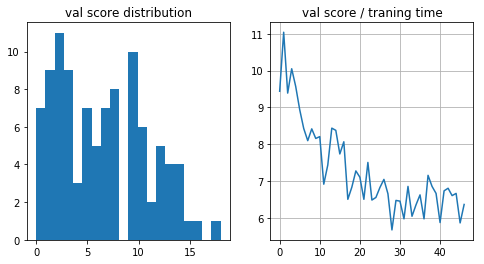

J=6.927, mean score=6.564
INFO:tensorflow:Restoring parameters from ./ckpt_dir/model2.ckpt


  2%|▏         | 1800/100000 [04:53<36:49:28,  1.35s/it]

Restore Finished!


  2%|▏         | 1830/100000 [04:56<3:02:43,  8.95it/s] 

KeyboardInterrupt: 

In [105]:
#REPORT_FREQ=1
tf.reset_default_graph()
seq2seq = Seq2SeqModel(hparams2)
seq2seq.build_graph()

sess = tf.Session()
seq2seq.restore(sess)
    #tvars = tf.trainable_variables()
    #tvars_vals = sess.run(tvars)
    
    #for var, val in zip(tvars, tvars_vals):
    #    print(var.name, val)
    
for i in trange(100000):
        #for i in trange(200):
        inputs, inputs_len, targets, targets_len = sample_batch(train_words, word_to_translation,32)
        loss_history.append(
            seq2seq.rl_train_step(sess, inputs, inputs_len, targets, targets_len)
            )
        #print("infer:", seq2seq_inferencer.infer(sess, inputs, inputs_len))
        
        if (i+1)%REPORT_FREQ==0:
        #if (i+1)%10 == 0:
            #seq2seq.save(sess)
            sess.close()
            
            tf.reset_default_graph()
            seq2seq_inferencer = Seq2SeqModel(hparams2, mode='inference')
            seq2seq_inferencer.build_graph()
            sess = tf.Session()
            seq2seq_inferencer.restore(sess)
            
            clear_output(True)
            current_scores = score(sess, seq2seq_inferencer)
            editdist_history.append(current_scores.mean())
            plt.figure(figsize=(8,4))
            plt.subplot(121)
            plt.title('val score distribution')
            plt.hist(current_scores, bins = 20)
            plt.subplot(122)
            plt.title('val score / traning time')
            plt.plot(editdist_history)
            plt.grid()
            plt.show()
            print("J=%.3f, mean score=%.3f"%(np.mean(loss_history[-10:]),np.mean(editdist_history[-10:])))
            sess.close()
            tf.reset_default_graph()
            
            seq2seq = Seq2SeqModel(hparams2)
            seq2seq.build_graph()

            sess = tf.Session()
            seq2seq.restore(sess)


## 결과

In [177]:
seq2seq_inferencer = Seq2SeqModel(hparams2, mode='inference')
seq2seq_inferencer.build_graph()
saver = tf.train.Saver()
with tf.Session() as sess:
    seq2seq_inferencer.restore(saver, sess)
    print(seq2seq_inferencer.translate(sess, "EXAMPLE;"))

INFO:tensorflow:Restoring parameters from ./ckpt_dir/model.ckpt
Restore Finished!
example;


In [1]:
#predicted_translations = list(map(model.translate,tqdm(test_words)))
#distances = map(get_score,test_words,predicted_translations)

#print ("Mean Levenshtein distance:",np.mean(distances))
#print ("Median Levenshtein distance:",np.median(distances))
#plt.hist(distances,range=[0,10]);